In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
import sqlite3
conn = sqlite3.connect('../data/hist_prices.db')
c = conn.cursor()

In [3]:
data = pd.read_sql('''SELECT * FROM binance_coin''', conn)
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,200395.0,10513800.0
1,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,344499.0,10773700.0
2,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,342568.0,10406700.0
3,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,340218.0,10781100.0
4,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,224261.0,10641400.0


In [4]:
# Add some more features derived from the exiting ones
data['Range'] = data.High - data.Low
data['Difference'] = data.Close - data.Open

In [5]:
data.drop(labels='SNo', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        1442 non-null   object 
 1   Symbol      1442 non-null   object 
 2   Date        1442 non-null   object 
 3   High        1442 non-null   float64
 4   Low         1442 non-null   float64
 5   Open        1442 non-null   float64
 6   Close       1442 non-null   float64
 7   Volume      1442 non-null   float64
 8   Marketcap   1442 non-null   float64
 9   Range       1442 non-null   float64
 10  Difference  1442 non-null   float64
dtypes: float64(8), object(3)
memory usage: 124.0+ KB


In [6]:
#Converting Date column to Datetime
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        1442 non-null   object        
 1   Symbol      1442 non-null   object        
 2   Date        1442 non-null   datetime64[ns]
 3   High        1442 non-null   float64       
 4   Low         1442 non-null   float64       
 5   Open        1442 non-null   float64       
 6   Close       1442 non-null   float64       
 7   Volume      1442 non-null   float64       
 8   Marketcap   1442 non-null   float64       
 9   Range       1442 non-null   float64       
 10  Difference  1442 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 124.0+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Marketcap,Range,Difference
count,1442.000000,1442.000000,1442.000000,1442.000000,1.442000e+03,1.442000e+03,1442.000000,1442.000000
mean,54.764100,49.165813,52.028231,52.250308,6.269804e+08,7.835575e+09,5.598287,0.222076
std,121.675817,108.118454,115.170060,115.390917,1.479775e+09,1.780041e+10,16.765412,10.926975
min,0.101211,0.096109,0.099721,0.099867,9.284190e+03,9.986680e+06,0.003850,-169.837247
25%,10.390750,9.677340,10.037860,10.068350,5.089148e+07,1.157863e+09,0.487699,-0.349946
50%,16.592114,15.727250,16.210328,16.210569,1.981830e+08,2.451099e+09,0.938045,0.011188
75%,28.240910,26.963038,27.669888,27.691107,3.942378e+08,4.061743e+09,1.776181,0.452050
max,690.931965,631.465298,676.315905,675.684077,1.798295e+10,1.036722e+11,232.262867,136.628176


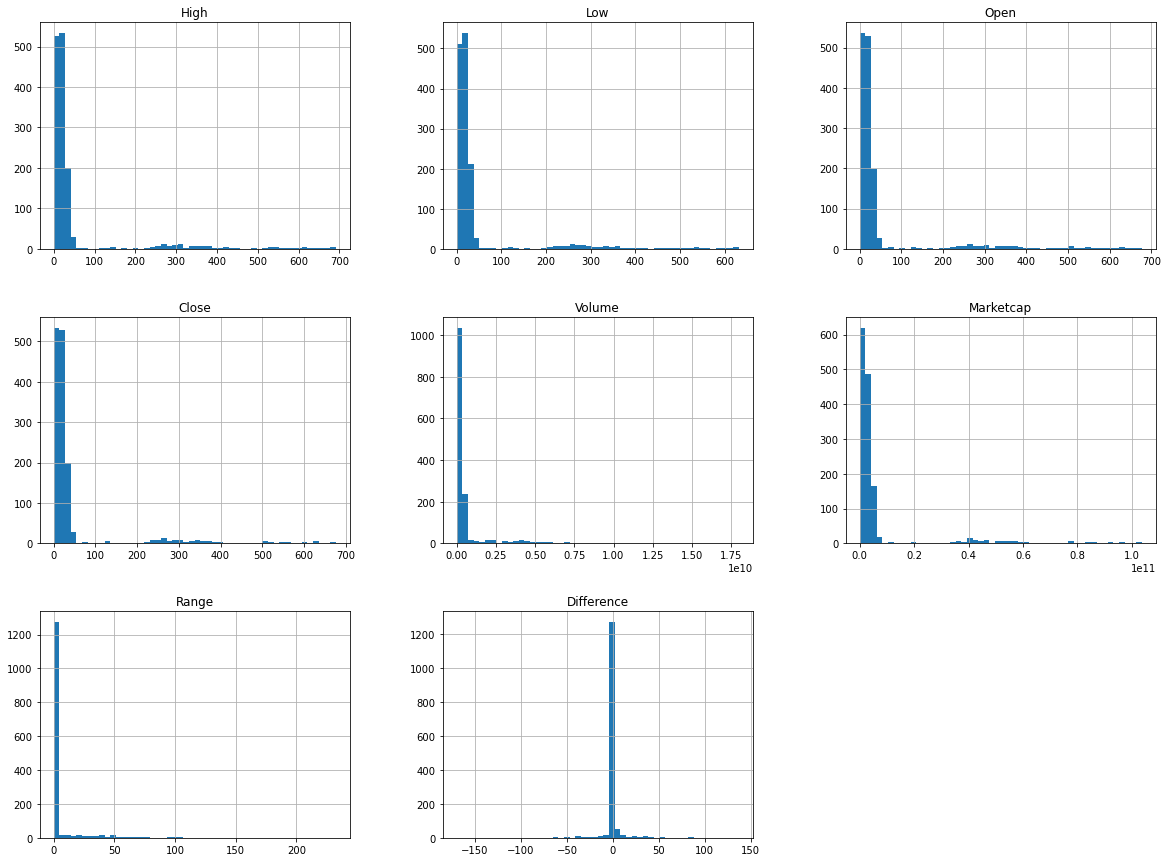

In [9]:
data[['High','Low','Open','Close','Volume','Marketcap','Range','Difference']].hist(bins=50, figsize = (20, 15))
plt.show();

In [10]:
#Days with the biggest price loss
data[['Date', 'Difference']].sort_values(by='Difference').head(10).T

,1393,1386,1305,1426,1395,1378,1391,1357,1365,1402
Date,2021-05-19 23:59:59,2021-05-12 23:59:59,2021-02-20 23:59:59,2021-06-21 23:59:59,2021-05-21 23:59:59,2021-05-04 23:59:59,2021-05-17 23:59:59,2021-04-13 23:59:59,2021-04-21 23:59:59,2021-05-28 23:59:59
Difference,-169.837247,-83.593654,-76.964711,-68.342192,-65.245253,-65.115605,-52.481134,-47.402073,-40.87764,-39.955782


In [11]:
# Days with the biggest price gain
data[['Date', 'Difference']].sort_values(by='Difference', ascending=False).head(10).T

,1304,1398,1364,1356,1394,1377,1355,1322,1314,1379
Date,2021-02-19 23:59:59,2021-05-24 23:59:59,2021-04-20 23:59:59,2021-04-12 23:59:59,2021-05-20 23:59:59,2021-05-03 23:59:59,2021-04-11 23:59:59,2021-03-09 23:59:59,2021-03-01 23:59:59,2021-05-05 23:59:59
Difference,136.628176,84.190093,83.233927,72.02085,58.056035,53.781388,53.739136,53.067751,44.678631,42.331669


In [12]:
fig = px.line(data, x='Date', y="Close")
fig.show();

In [13]:
fig = px.line(data, x='Date', y="Marketcap")
fig.show();

In [14]:
fig = px.line(data, x='Date', y="Difference")
fig.show();

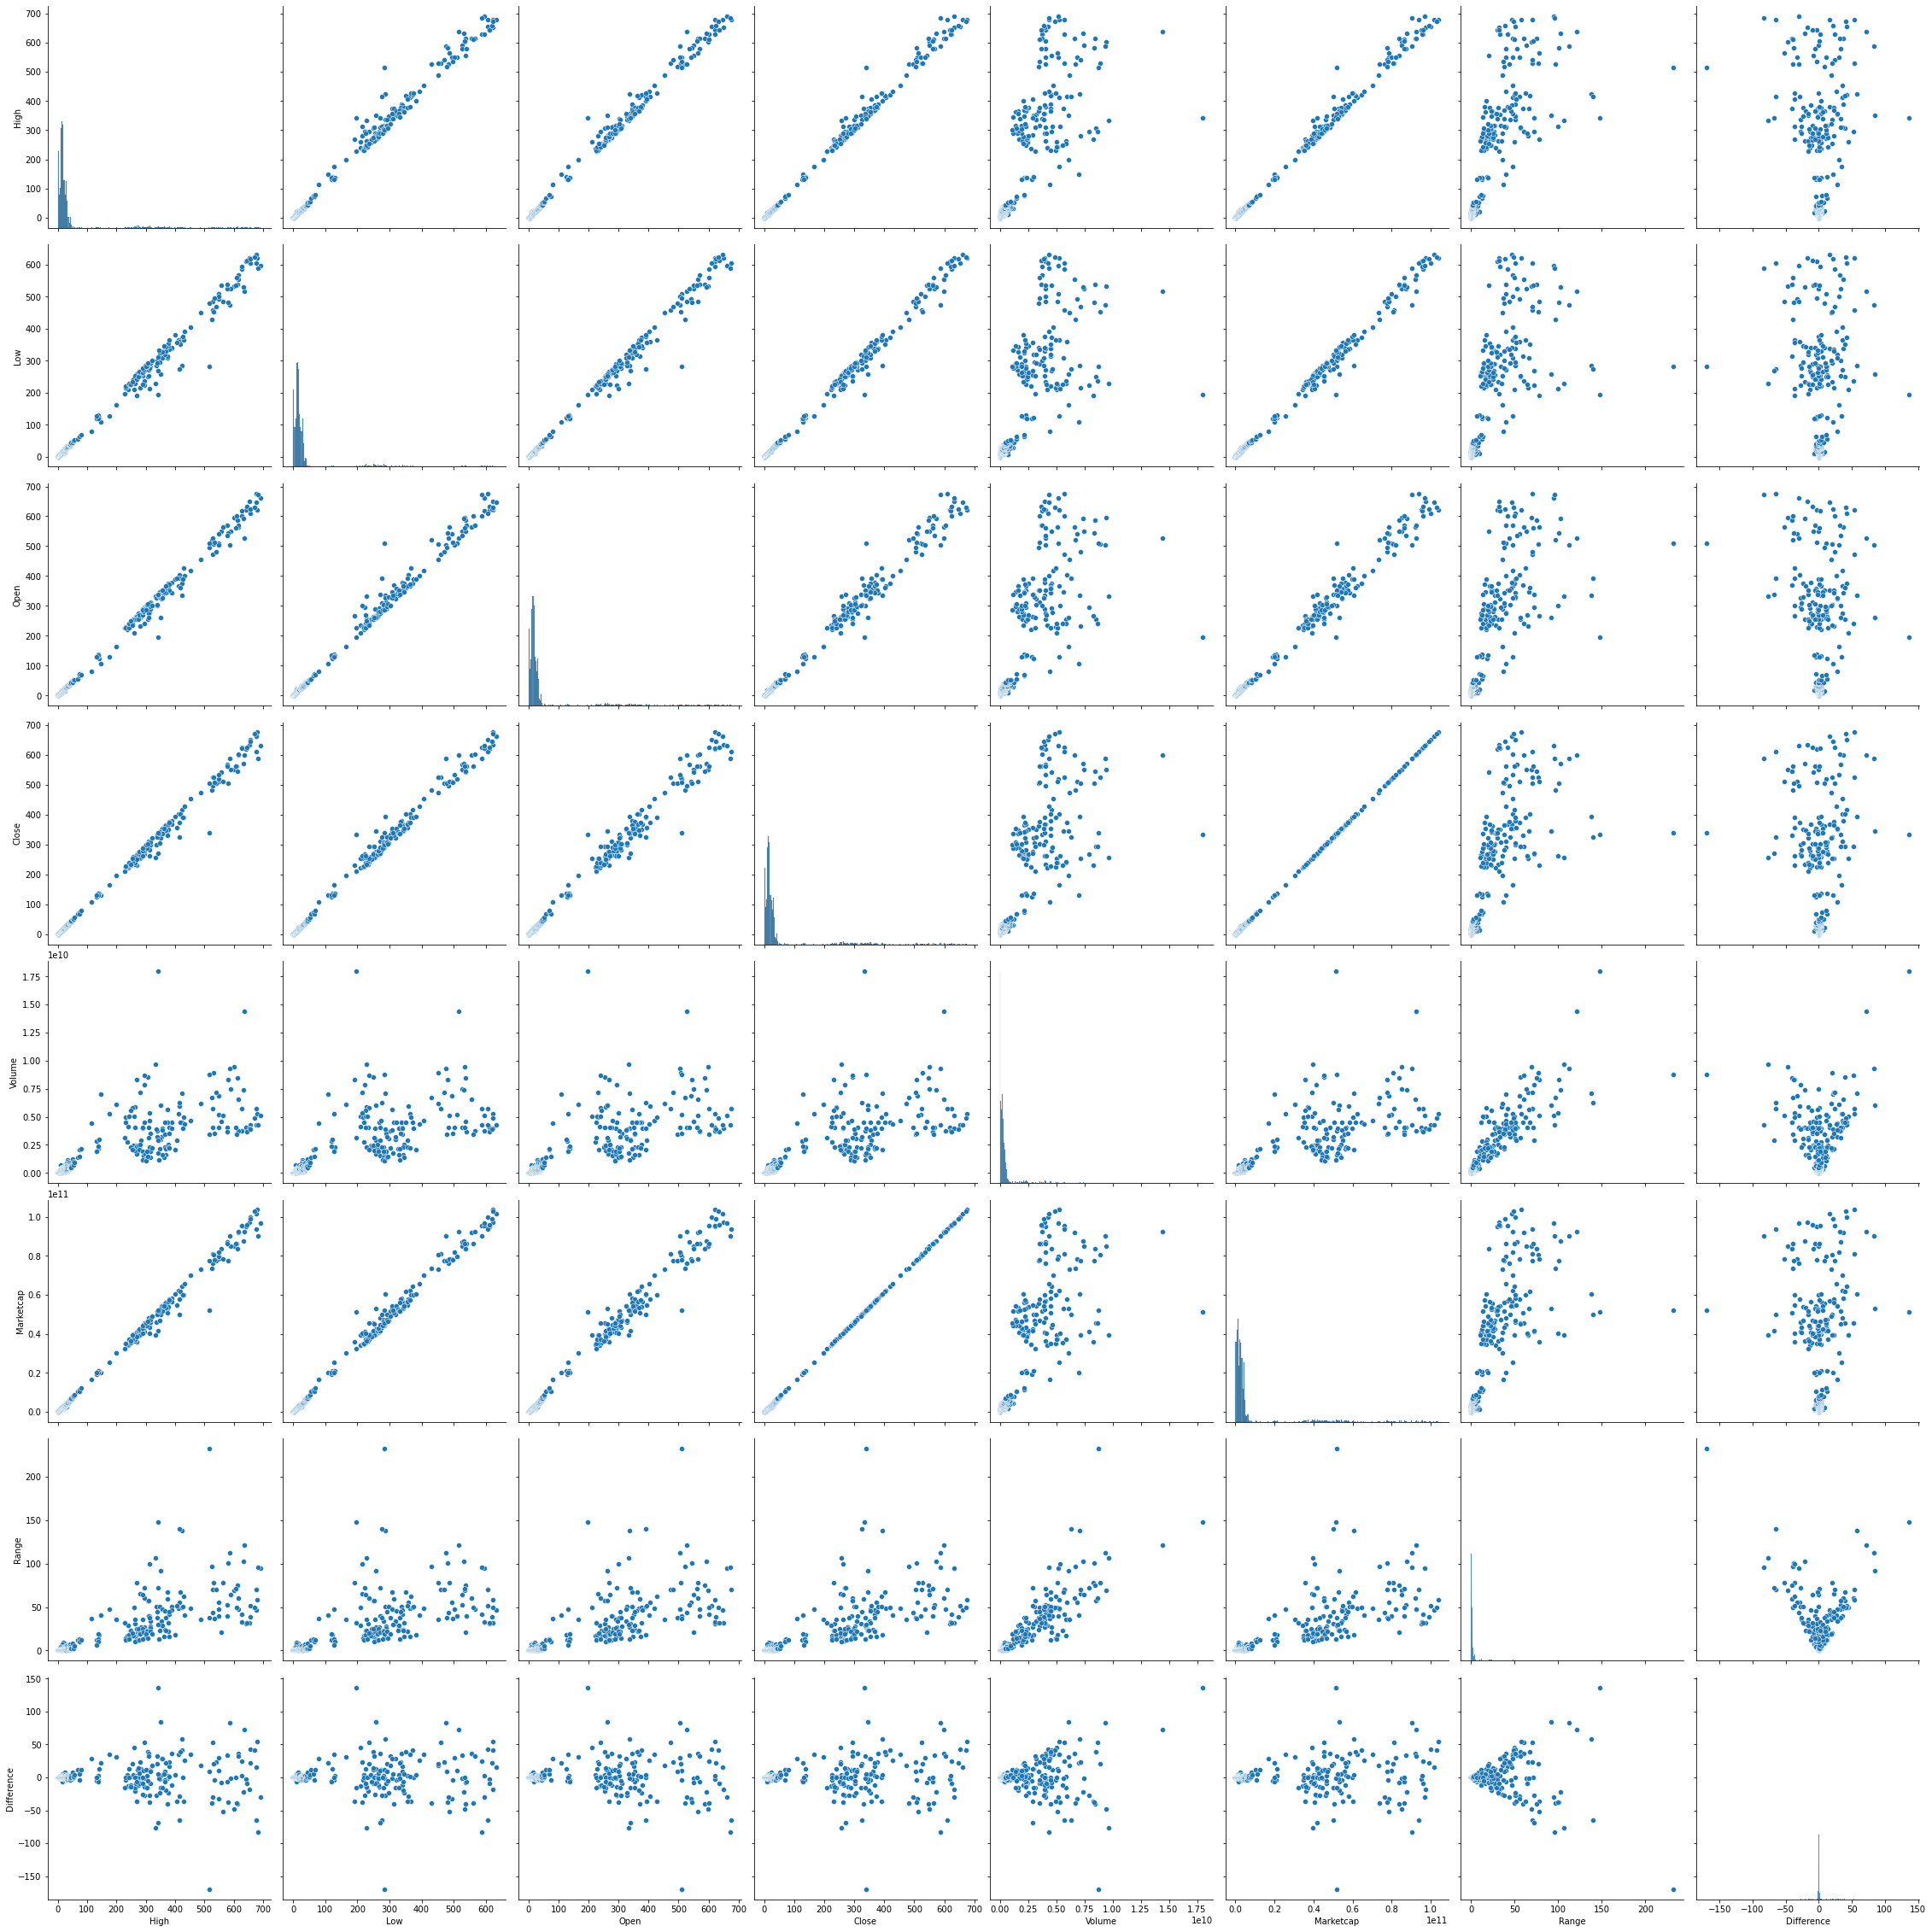

In [15]:
sns.pairplot(data,height=4);
